In [1]:
import numpy as np
import pandas as pd
from chembl_webresource_client.new_client import new_client
import requests
from bs4 import BeautifulSoup
import re
# Chem libraries 
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

#### Data scrapping from FDA data base related to pancreatic carcinoma drugs

In [2]:
def web_scrapping():
    """
    Extraction function from FDA website with approved pancreatic drugs"
  
    Returns:
      Extractet text in string format for future handling.
    """
    page_url = 'https://www.cancer.gov/about-cancer/treatment/drugs/pancreatic'
    page = requests.get(page_url)

    print(page)
    
    # Parser page content with html parser
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Conver section 1 with drugs list to text form
    string = soup.find_all(id="1")[0].get_text()
    split_string = string.split('\n')

    return split_string

split_string = web_scrapping()

<Response [200]>


In [3]:
split_string

['Drugs Approved for Pancreatic Cancer',
 'Abraxane (Paclitaxel Albumin-stabilized Nanoparticle Formulation)',
 'Afinitor (Everolimus)',
 'Capecitabine',
 'Erlotinib Hydrochloride',
 'Everolimus',
 '5-FU (Fluorouracil Injection)',
 'Fluorouracil Injection',
 'Gemcitabine Hydrochloride',
 'Gemzar (Gemcitabine Hydrochloride)',
 'Infugem\xa0(Gemcitabine Hydrochloride)',
 'Irinotecan Hydrochloride Liposome',
 'Lynparza (Olaparib)',
 'Mitomycin',
 'Olaparib',
 'Onivyde (Irinotecan Hydrochloride Liposome)',
 'Paclitaxel Albumin-stabilized Nanoparticle Formulation',
 'Sunitinib Malate',
 'Sutent (Sunitinib Malate)',
 'Tarceva (Erlotinib Hydrochloride)',
 'Xeloda (Capecitabine)',
 '']

#### Drugs list modyfication for readable form

In [4]:
def modyfication_func():
    """
    Data handling function from string text format to DataFrame form"
  
    Returns:
      Clean form of FDA drugs lists"
    """
    # Data cleaning
    df_drugs = pd.DataFrame(split_string)
    df_drugs.drop(index=[0, 21], inplace=True)
    df_drugs.reset_index(drop=True)

    # Change three drugs name to increase readability
    df_drugs.iloc[:, 0].replace({"Abraxane (Paclitaxel Albumin-stabilized Nanoparticle Formulation)": "Paclitaxel", 
                              "Fluorouracil Injection": "Fluorouracil", 
                              "Irinotecan Hydrochloride Liposome": "Irinotecan"}, inplace=True)
    
    # List of drugs with the same active substance (we drop drugs with differen trade name but with the same active substance)

    df_drugs.drop(index=[2, 6, 9, 10, 12, 15, 16, 18, 19,20], inplace=True)

    df_drugs.reset_index(drop=True, inplace=True)

    # Change format from df to list
    drugs_list = df_drugs.values.tolist()
    
    # Read each element inside drugs_list
    drugs_list = [i for drug in drugs_list for i in drug]
    
    # CHeMBL dataset better read upper word than lower
    drugs_list_upper = [i.upper() for i in drugs_list]
    
    # Custom function for all drugs list in one client query
    molecule = new_client.molecule
    mols = molecule.filter(pref_name__in=[i for i in drugs_list_upper])
    
    df = pd.DataFrame(mols)

    return df

df_drugs = modyfication_func()

In [5]:
df_drugs

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,[L01CE02],1,None,1,80630.0,1,"[{'xref_id': 'irinotecan%20hydrochloride', 'xr...",False,1996,0,...,IRINOTECAN,1,MOL,True,False,-tecan,antineoplastics (camptothecin derivatives),-tecan,1995.0,False
1,[L01CD01],1,None,1,45863.0,1,"[{'xref_id': 'paclitaxel', 'xref_name': 'pacli...",True,1992,0,...,PACLITAXEL,0,MOL,True,False,-taxel,"antineoplastics, taxane derivatives",-taxel,1993.0,False
2,[L01DC03],1,None,1,27504.0,1,"[{'xref_id': 'mitomycin', 'xref_name': 'mitomy...",True,1981,0,...,MITOMYCIN,1,MOL,True,True,-mycin,antibiotics (Streptomyces strain),-mycin,1972.0,False
3,"[L01BC02, L01BC52]",1,None,0,46345.0,2,"[{'xref_id': 'fluorouracil', 'xref_name': 'flu...",True,1962,0,...,FLUOROURACIL,0,MOL,True,True,-racil; -uracil,uracil type antineoplastics; uracil derivative...,-racil; -uracil,1962.0,False
4,[],1,None,1,NaN,2,"[{'xref_id': 'sunitinib%20malate', 'xref_name'...",True,2006,0,...,SUNITINIB MALATE,0,MOL,True,False,-tinib,tyrosine kinase inhibitors,-tinib,NaN,False
5,[L01XK01],1,None,0,83766.0,2,"[{'xref_id': 'olaparib', 'xref_name': 'olapari...",True,2014,1,...,OLAPARIB,0,MOL,True,False,-parib,poly-ADP-ribose polymerase inhibitors,-parib,2013.0,False
6,[],1,None,0,31647.0,1,"[{'xref_id': 'gemcitabine%20hydrochloride', 'x...",True,1996,0,...,GEMCITABINE HYDROCHLORIDE,1,MOL,True,False,-citabine,"nucleoside antiviral or antineoplastic agents,...",-citabine,1990.0,False
7,[L01BC06],1,None,1,31348.0,1,"[{'xref_id': 'capecitabine', 'xref_name': 'cap...",True,1998,0,...,CAPECITABINE,1,MOL,True,False,-citabine,"nucleoside antiviral or antineoplastic agents,...",-citabine,1995.0,False
8,[],1,None,0,53509.0,2,"[{'xref_id': 'erlotinib%20hydrochloride', 'xre...",True,2004,0,...,ERLOTINIB HYDROCHLORIDE,0,MOL,True,False,-tinib,tyrosine kinase inhibitors,-tinib,2001.0,False
9,"[L01EG02, L04AA18]",1,None,1,68478.0,1,"[{'xref_id': 'everolimus', 'xref_name': 'evero...",True,2009,0,...,EVEROLIMUS,0,MOL,True,False,-imus,immunosuppressives,-imus,2003.0,False


#### Smile format for all drugs appearing in df

In [12]:
def smile_format():
    """
    Data selection for smile format molecule, CheMBL id and molecule name.
    
    Returns:
    
    DataFrame with molecule_chembl_id,	molecule_structures and pref_name columns.
    
    """
    
    # Data extraction only for visualisation purpose.
    
    df_drug_smile = df_drugs.loc[:, ["molecule_chembl_id", "molecule_structures", "pref_name"]]
    
    df_drug_smile.reset_index(drop=True)
    
    return df_drug_smile

df_drug_smile = smile_format()

In [13]:
df_drug_smile.sample(4)

,molecule_chembl_id,molecule_structures,pref_name
3,CHEMBL185,{'canonical_smiles': 'O=c1[nH]cc(F)c(=O)[nH]1'...,FLUOROURACIL
0,CHEMBL481,{'canonical_smiles': 'CCc1c2c(nc3ccc(OC(=O)N4C...,IRINOTECAN
4,CHEMBL1567,{'canonical_smiles': 'CCN(CC)CCNC(=O)c1c(C)[nH...,SUNITINIB MALATE
5,CHEMBL521686,{'canonical_smiles': 'O=C(c1cc(Cc2n[nH]c(=O)c3...,OLAPARIB


#### Drug graphic structures by selecting ChEMBL molecule pref_name

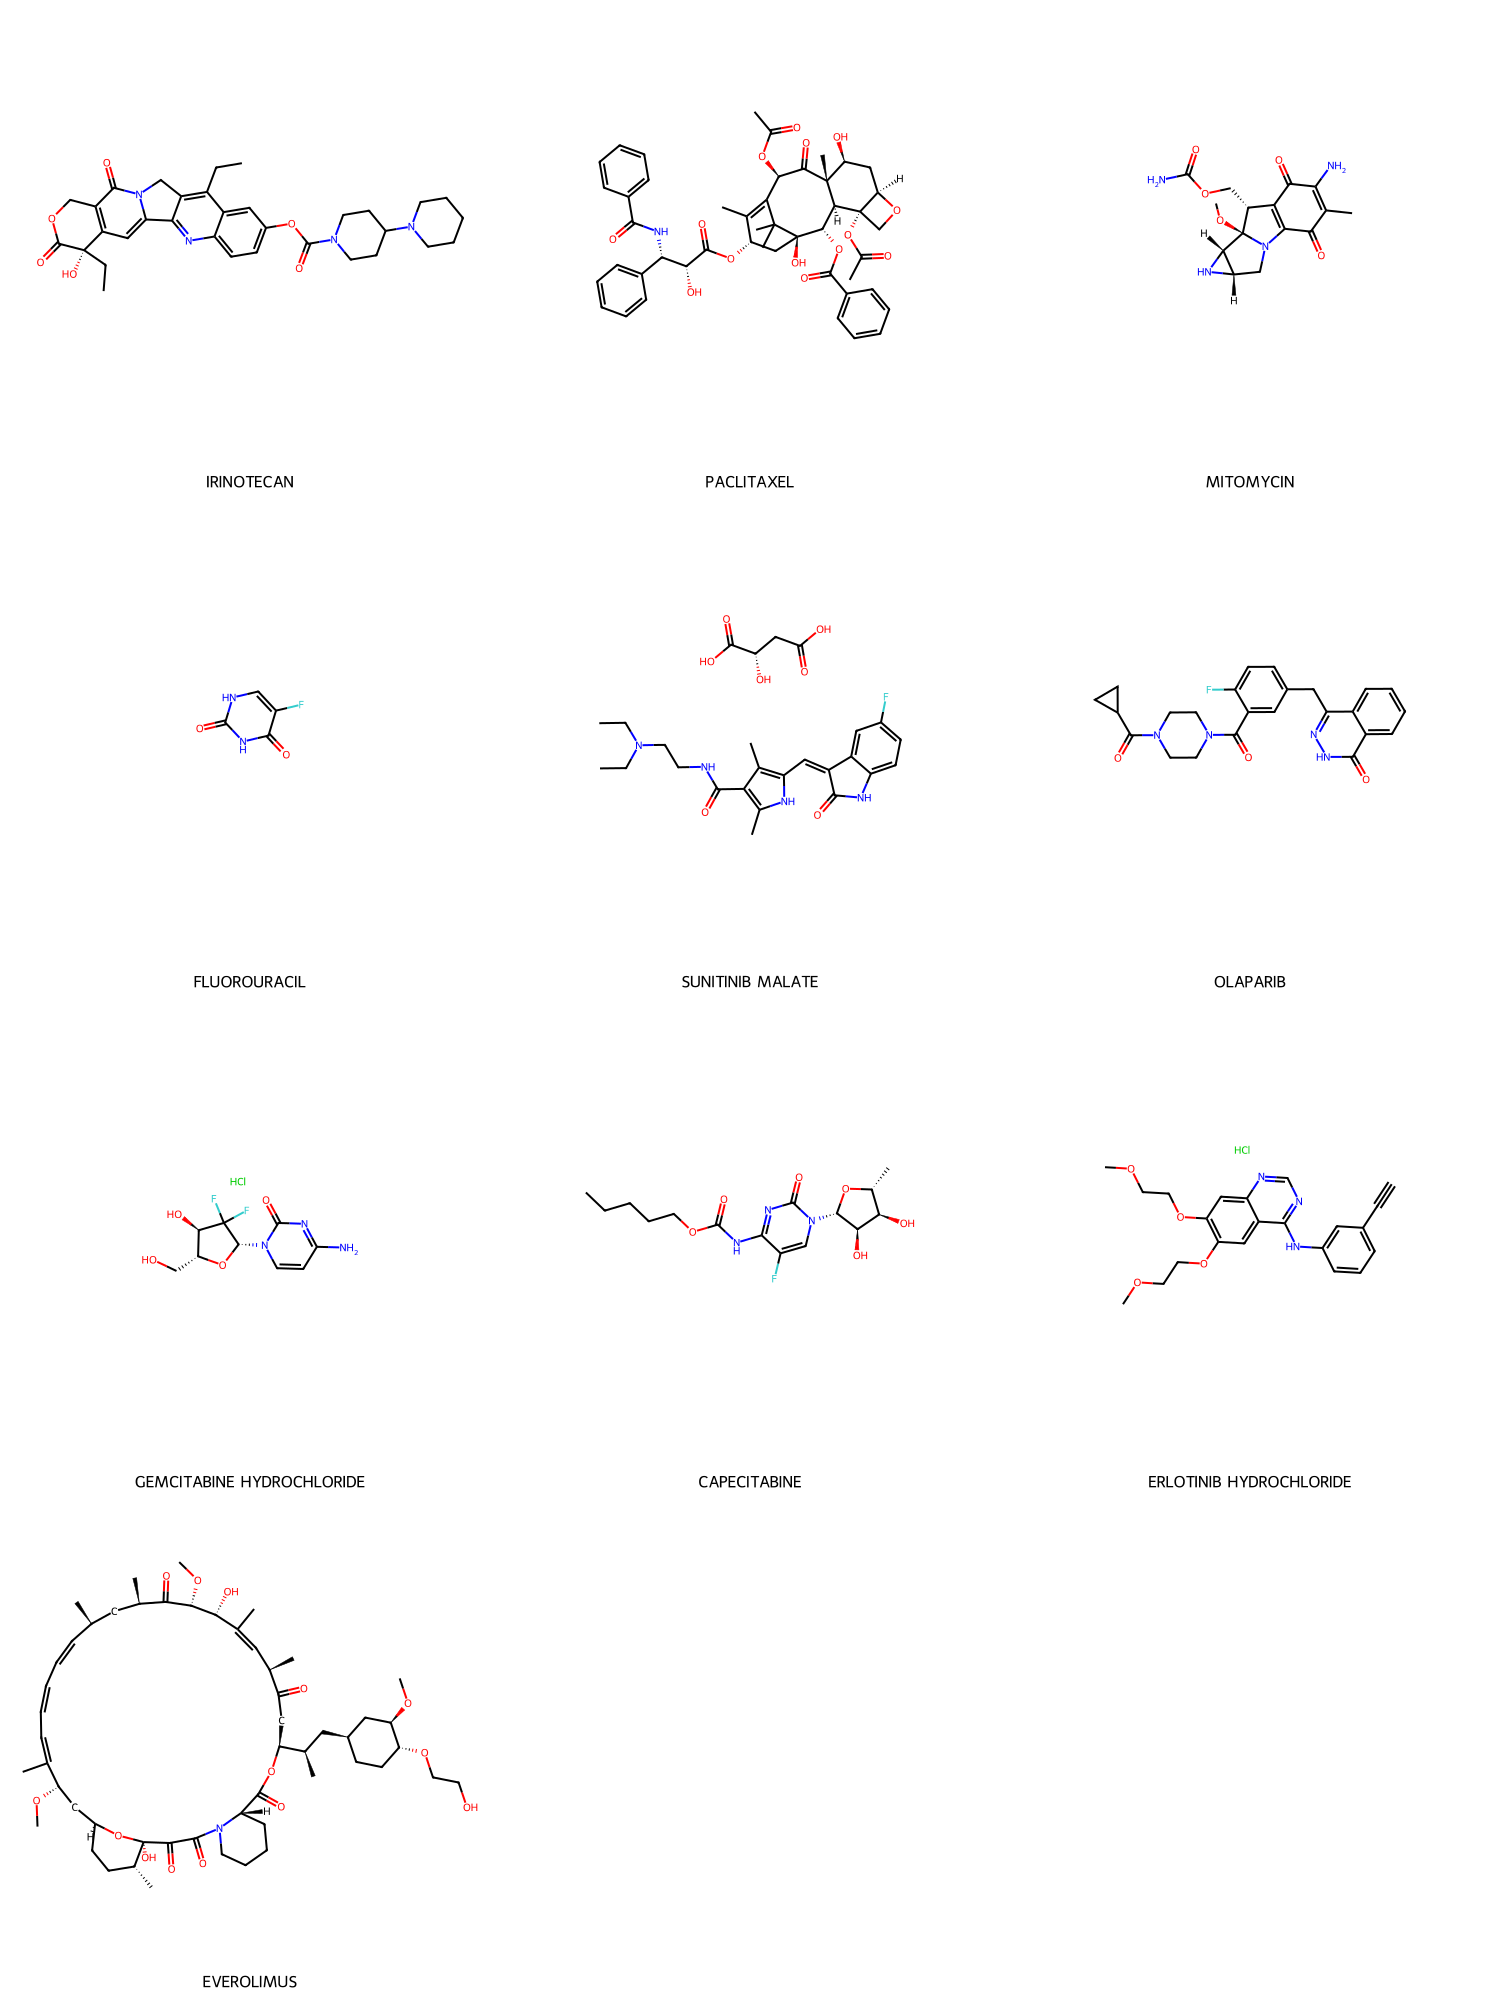

In [14]:
def molecule_visualisation():
    """
        Function for visualisation from smile file format.
        
        Returns:
            Each molecular visualisation with name.
    """
# Data reading to list of drugs from column molecule_structures
smiList = []

for i in range(len(df_drug_smile.molecule_structures)):
    smiList.append(df_drug_smile.molecule_structures[i]["canonical_smiles"])

# Create RDKit molecular objects
mols =  [Chem.MolFromSmiles(m) for m in smiList]

# Create list of name as a parameter
drugs_name = [i for i in df_drug_smile.pref_name]

# Draw each molecule with names
Draw.MolsToGridImage(mols, molsPerRow=3, legends=drugs_name, subImgSize=(500,500), useSVG=True)

#### Properties value of each drug selecting by ChEMBL molecule name

In [15]:
def drugs_properties_extract_function():
    """
    Exctract function for each molecule properties.
    Returns:
    DataFrame with drugs properties values.
    """
    # Create list of molecular propierties
    drugs_properties = []
    
    for i in range(len(df_drugs.molecule_properties)):
        drugs_properties.append(df_drugs.molecule_properties[i])
    
    # Creat drugs name list from df_drug_smile DataFrame  
    drugs_name_list = [i for i in df_drug_smile.pref_name]
    
    # Change format from dict to DataFrame and assign column witn substance names
    df_drugs_properties = pd.DataFrame.from_dict(drugs_properties).assign(pref_name = drugs_name_list)
    
    # Move column name for the first
    column_to_move = df_drugs_properties.pop("pref_name")
    df_drugs_properties.insert(0, "pref_name", column_to_move)
    
    return df_drugs_properties

df_drugs_properties = drugs_properties_extract_function()

In [16]:
df_drugs_properties

,pref_name,alogp,aromatic_rings,cx_logd,cx_logp,cx_most_apka,cx_most_bpka,full_molformula,full_mwt,hba,...,molecular_species,mw_freebase,mw_monoisotopic,np_likeness_score,num_lipinski_ro5_violations,num_ro5_violations,psa,qed_weighted,ro3_pass,rtb
0,IRINOTECAN,4.09,3,0.72,2.78,11.71,9.47,C33H38N4O6,586.69,9,...,BASE,586.69,586.2791,0.26,1,1,114.20,0.36,N,4
1,PACLITAXEL,3.74,3,3.54,3.54,11.90,None,C47H51NO14,853.92,14,...,NEUTRAL,853.92,853.3310,1.87,2,2,221.29,0.13,N,10
2,MITOMYCIN,-1.65,0,-1.05,-1.05,None,5.60,C15H18N4O5,334.33,8,...,NEUTRAL,334.33,334.1277,2.07,0,0,146.89,0.41,N,3
3,FLUOROURACIL,-0.80,1,-1.08,-0.66,7.18,None,C4H3FN2O2,130.08,2,...,NEUTRAL,130.08,130.0179,-0.80,0,0,65.72,0.48,N,0
4,SUNITINIB MALATE,3.33,2,1.28,2.93,11.46,9.04,C26H33FN4O7,532.57,3,...,BASE,398.48,398.2118,-1.21,0,0,77.23,0.63,N,7
5,OLAPARIB,2.35,3,1.96,1.96,9.96,None,C24H23FN4O3,434.47,4,...,NEUTRAL,434.47,434.1754,-1.61,0,0,86.37,0.68,N,4
6,GEMCITABINE HYDROCHLORIDE,-1.29,1,-1.47,-1.47,11.52,None,C9H12ClF2N3O4,299.66,7,...,NEUTRAL,263.20,263.0718,1.30,0,0,110.60,0.61,N,2
7,CAPECITABINE,0.76,1,0.75,0.77,8.63,None,C15H22FN3O6,359.35,8,...,NEUTRAL,359.35,359.1493,0.38,0,0,122.91,0.64,N,6
8,ERLOTINIB HYDROCHLORIDE,3.41,3,3.20,3.20,None,4.62,C22H24ClN3O4,429.90,7,...,NEUTRAL,393.44,393.1689,-1.22,0,0,74.73,0.42,N,10
9,EVEROLIMUS,6.20,0,7.40,7.40,9.96,None,C53H83NO14,958.24,14,...,NEUTRAL,958.24,957.5814,1.84,3,3,204.66,0.13,N,9


#### Mechanism of action for each anti-cancer drug

In [25]:
# Convert pd.Series to Numpy array (elimination of duplicates) and convert array to list for CHEMBL web client
cancer_drugs_list = np.unique(df_drugs.molecule_chembl_id).tolist()

molecule = new_client.mechanism
mols = molecule.filter(molecule_chembl_id__in=[i for i in cancer_drugs_list])

In [26]:
mol = pd.DataFrame.from_dict(mols)
mol

,action_type,binding_site_comment,direct_interaction,disease_efficacy,max_phase,mec_id,mechanism_comment,mechanism_of_action,mechanism_refs,molecular_mechanism,molecule_chembl_id,parent_molecule_chembl_id,record_id,selectivity_comment,site_id,target_chembl_id,variant_sequence
0,INHIBITOR,None,1,1,4,236,None,Macrophage colony stimulating factor receptor ...,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1844,None
1,INHIBITOR,None,1,1,4,243,None,Epidermal growth factor receptor erbB1 inhibitor,[{'ref_id': 'setid=57bccb29-1c47-4c64-ab6a-779...,1,CHEMBL1079742,CHEMBL553,1344174,None,NaN,CHEMBL203,None
2,INHIBITOR,None,1,1,4,384,None,FK506-binding protein 1A inhibitor,[{'ref_id': 'setid=2150f73a-179b-4afc-b8ce-67c...,1,CHEMBL1908360,CHEMBL1908360,1344572,None,NaN,CHEMBL1902,None
3,INHIBITOR,None,1,1,4,450,None,Stem cell growth factor receptor inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1936,None
4,INHIBITOR,None,1,1,4,485,None,Thymidylate synthase inhibitor,[{'ref_id': 'setid=a1de8bba-3b1d-4c9d-ab8a-32d...,1,CHEMBL1773,CHEMBL1773,1343623,None,NaN,CHEMBL1952,None
5,INHIBITOR,None,1,1,4,486,None,Thymidylate synthase inhibitor,[{'ref_id': 'setid=b90e0da7-f702-4f09-9488-74f...,1,CHEMBL185,CHEMBL185,1344829,None,NaN,CHEMBL1952,None
6,INHIBITOR,None,1,1,4,511,None,Tyrosine-protein kinase receptor FLT3 inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1974,None
7,INHIBITOR,Binds to beta tubulin,1,1,4,1102,None,Tubulin inhibitor,[{'ref_id': 'setid=24d10449-2936-4cd3-b7db-a76...,1,CHEMBL428647,CHEMBL428647,1344721,None,2629.0,CHEMBL2095182,None
8,INHIBITOR,None,1,1,4,1118,None,Platelet-derived growth factor receptor inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL2095189,None
9,INHIBITOR,M1 subunit is binding site,1,1,4,1260,None,Ribonucleoside-diphosphate reductase RR1 inhib...,[{'ref_id': 'setid=a625c92b-c569-4b98-8d2e-2b3...,1,CHEMBL1637,CHEMBL888,1344009,None,2652.0,CHEMBL2095215,None


In [27]:
# Extraction drug mechanism for CHEMBL481 molecule
for chembl_id in (x["molecule_chembl_id"] for x in new_client.molecule_form.get("CHEMBL481")['molecule_forms']):
    mechanism_records = new_client.mechanism.filter(molecule_chembl_id=chembl_id)

In [28]:
mol_chembl481 = pd.DataFrame.from_dict(mechanism_records)

In [29]:
mol_chembl481

,action_type,binding_site_comment,direct_interaction,disease_efficacy,max_phase,mec_id,mechanism_comment,mechanism_of_action,mechanism_refs,molecular_mechanism,molecule_chembl_id,parent_molecule_chembl_id,record_id,selectivity_comment,site_id,target_chembl_id,variant_sequence
0,INHIBITOR,None,1,1,4,54,None,DNA topoisomerase I inhibitor,[{'ref_id': 'setid=80f3b79c-a399-45b3-b755-853...,1,CHEMBL3989514,CHEMBL481,1344312,None,None,CHEMBL1781,None


#### Merge two dataframe with drugs mechanism into one

In [30]:
df_drugs_mechanism = pd.concat([mol, mol_chembl481], axis=0).reset_index(drop=True)

In [31]:
df_drugs_mechanism

,action_type,binding_site_comment,direct_interaction,disease_efficacy,max_phase,mec_id,mechanism_comment,mechanism_of_action,mechanism_refs,molecular_mechanism,molecule_chembl_id,parent_molecule_chembl_id,record_id,selectivity_comment,site_id,target_chembl_id,variant_sequence
0,INHIBITOR,None,1,1,4,236,None,Macrophage colony stimulating factor receptor ...,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1844,None
1,INHIBITOR,None,1,1,4,243,None,Epidermal growth factor receptor erbB1 inhibitor,[{'ref_id': 'setid=57bccb29-1c47-4c64-ab6a-779...,1,CHEMBL1079742,CHEMBL553,1344174,None,NaN,CHEMBL203,None
2,INHIBITOR,None,1,1,4,384,None,FK506-binding protein 1A inhibitor,[{'ref_id': 'setid=2150f73a-179b-4afc-b8ce-67c...,1,CHEMBL1908360,CHEMBL1908360,1344572,None,NaN,CHEMBL1902,None
3,INHIBITOR,None,1,1,4,450,None,Stem cell growth factor receptor inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1936,None
4,INHIBITOR,None,1,1,4,485,None,Thymidylate synthase inhibitor,[{'ref_id': 'setid=a1de8bba-3b1d-4c9d-ab8a-32d...,1,CHEMBL1773,CHEMBL1773,1343623,None,NaN,CHEMBL1952,None
5,INHIBITOR,None,1,1,4,486,None,Thymidylate synthase inhibitor,[{'ref_id': 'setid=b90e0da7-f702-4f09-9488-74f...,1,CHEMBL185,CHEMBL185,1344829,None,NaN,CHEMBL1952,None
6,INHIBITOR,None,1,1,4,511,None,Tyrosine-protein kinase receptor FLT3 inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL1974,None
7,INHIBITOR,Binds to beta tubulin,1,1,4,1102,None,Tubulin inhibitor,[{'ref_id': 'setid=24d10449-2936-4cd3-b7db-a76...,1,CHEMBL428647,CHEMBL428647,1344721,None,2629.0,CHEMBL2095182,None
8,INHIBITOR,None,1,1,4,1118,None,Platelet-derived growth factor receptor inhibitor,[{'ref_id': 'setid=43a4d7f8-48ae-4a63-9108-2fa...,1,CHEMBL1567,CHEMBL535,1343773,None,NaN,CHEMBL2095189,None
9,INHIBITOR,M1 subunit is binding site,1,1,4,1260,None,Ribonucleoside-diphosphate reductase RR1 inhib...,[{'ref_id': 'setid=a625c92b-c569-4b98-8d2e-2b3...,1,CHEMBL1637,CHEMBL888,1344009,None,2652.0,CHEMBL2095215,None


#### Anti-cancer drugs activity filtered by standard type IC50 (half maximal inhibitory concentration)

In [39]:
"""
    The previous DataFrame contains a column called target_chembl_id. 
    In this column, we can find which molecule exactly targets anticancer drugs.
    For example, the molecule CHEMBL481 (Irinotecan) targets CHEMBL1781 which is a single DNA topoisomerase I protein.
"""
# Convert pd.Series to Numpy array (elimination of duplicates) and convert array to list for activity web client
drugs_target_list = np.unique(df_drugs_mechanism.target_chembl_id).tolist()

In [40]:
# Extract target drugs activity for ChEMBL web client needs

activity = new_client.activity

mols_activity = activity.filter(target_chembl_id__in=[i for i in drugs_target_list]).filter(standard_type="IC50")

In [38]:
df_target_activity = pd.DataFrame.from_dict(mols_activity)

In [ ]:
df_target_activity